In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('AAME.csv')
data = df[['Open', 'High', 'Low', 'Close']].dropna()

In [11]:
data.isnull().sum()


Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:

# 결측치 제거
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])  
        y.append(data[i + sequence_length][0])       
    return np.array(x), np.array(y)

sequence_length = 10
x, y = create_sequences(scaled_data, sequence_length)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)

In [22]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(sequence_length, 4)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0058    
Epoch 2/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0032 
Epoch 3/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036    
Epoch 4/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 5/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030
Epoch 6/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029    
Epoch 7/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 8/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030    
Epoch 9/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027
Epoch 10/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036    
Epoch 11/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0032    
Epoch 12/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0033    
Epoch 13/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029    
Epoch 14/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029    
Epoch 15/50
505/505 

In [24]:
y_pred = model.predict(x_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [25]:
open_min = scaler.min_[0]
open_scale = scaler.scale_[0]
y_test_inverse = y_test / open_scale + open_min
y_pred_inverse = y_pred.flatten() / open_scale + open_min

In [26]:
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"MSE: {mse}")


MSE: 0.01282966967218273


/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/park-yeonseo/tensorflow_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning

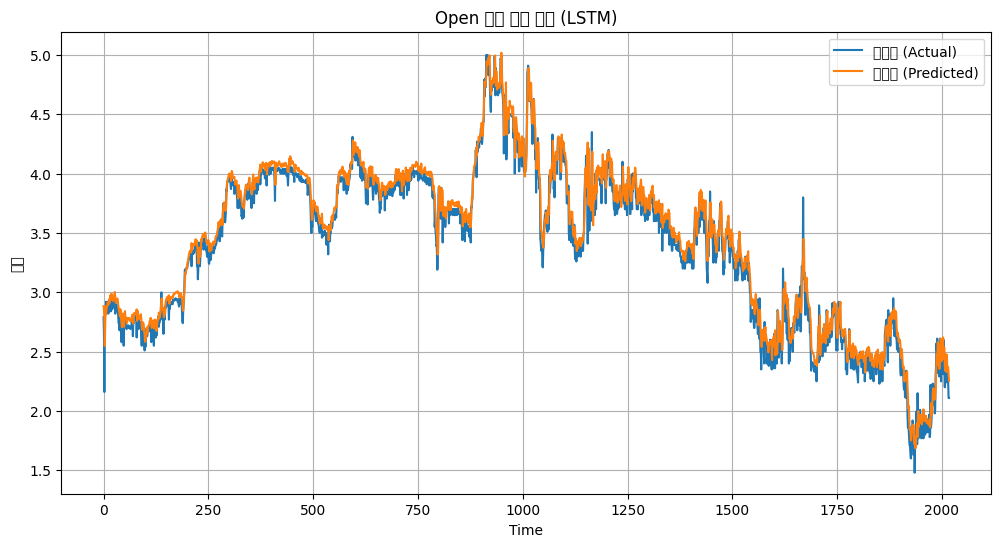

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='실제값 (Actual)')
plt.plot(y_pred_inverse, label='예측값 (Predicted)')
plt.title('Open 가격 예측 비교 (LSTM)')
plt.xlabel('Time')
plt.ylabel('가격')
plt.legend()
plt.grid(True)
plt.show()